# Homework 5

## Math Tools for Neural and Cognitive Science

Reuben Feinman

11/26/2017

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

np.random.seed(0)

# Problem #1

## (a)

In [4]:
# Generate 10,000 samples, each of size 10
X = np.random.normal(size=(10000, 10))
# Compute the average of each set of 10
means = X.mean(axis=1)

In [13]:
def histogram_continuous(samples, title=None, nbins=10, xlim=None):
    """
    A function that takes an array of numeric values and
    plots a histogram of the values, discretized into some
    pre-specified number of bins.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=nbins)
    if title is not None:
        plt.title(title, fontsize=20)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()

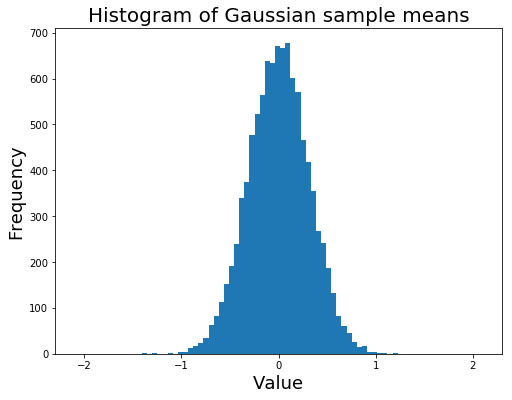

In [14]:
# Now plot a histogram of our averages, with 50 bins
histogram_continuous(
    means, 
    title='Histogram of Gaussian sample means', 
    nbins=50, 
    xlim=[-2.3, 2.3]
)

The histogram should look like a Gaussian curve, as it does. The central limit theorem says that the distribution of the sample means always converges to a Gaussian as N grows large, regardless of the sample distribution. Here we have N=10, which is sufficiently large for a Gaussian-looking curve.

TODO: answer other questions

## (b)

In [17]:
# Compute the medians of our sample sets
medians = np.median(X, axis=1)

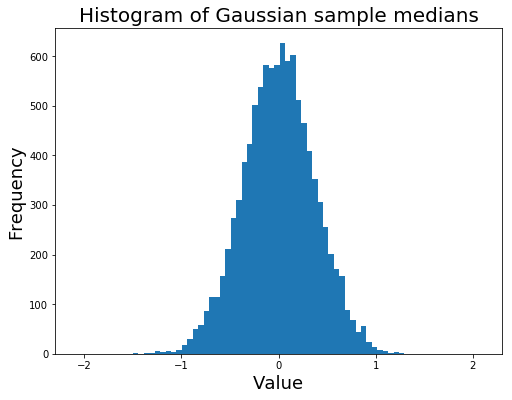

In [19]:
# Now plot a histogram of our means, with 50 bins
histogram_continuous(
    medians, 
    title='Histogram of Gaussian sample medians', 
    nbins=50, 
    xlim=[-2.3, 2.3]
)

This curve again has a Gaussian-like shape, similar to the distribution of means. Let's use the Q-Q plot to compare it to the normal distribution:

In [22]:
from scipy import stats

def normplot(x, title=None):
    """
    A function to replicate Matlab's "normplot" functionality. Takes
    a set of points and displays the Q-Q plot for these points.
    """
    plt.figure(figsize=(10,8))
    # Calculate quantiles and least-square-fit curve
    (quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')
    # Plot results
    plt.plot(values, quantiles,'ob', marker='+')
    plt.plot(quantiles * slope + intercept, quantiles, 'r')
    #define ticks
    ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
    # Transfrom them from precentile to cumulative density
    ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
    # Assign new ticks
    plt.yticks(ticks_quan,ticks_perc)
    if title is not None:
        plt.title(title, fontsize=20)
    plt.ylabel('Probability (%)', fontsize=18)
    plt.xlabel('Data', fontsize=18)
    plt.show()

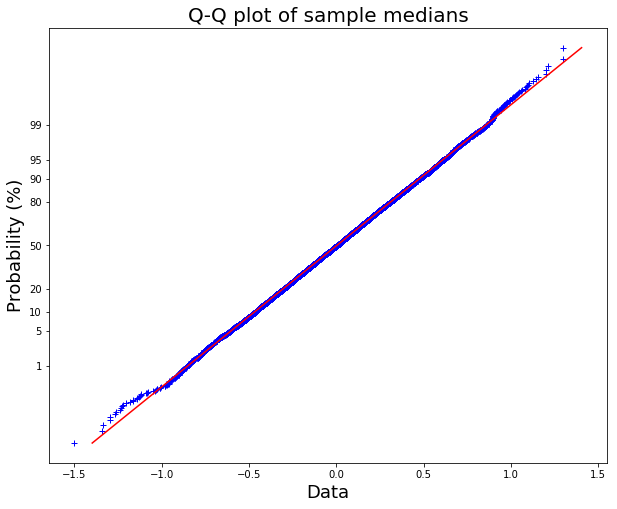

In [26]:
# Show the Q-Q plot
normplot(medians, title='Q-Q plot of sample medians')

No, the distribution of medians does not deviate significantly - it looks approximately Normal (points are a straight line).

## (c)

In [47]:
def compute_min_max_means(X):
    """
    A helper function that takes a data set of size 
    (nb_trials, nb_samples_per_trial) and computes, 
    for each trial, the mean of the max and min for
    that trial.
    """
    # Compute the max for each sample
    maxs = X.max(axis=1).reshape(-1,1)
    # Compute the min for each sample
    mins = X.min(axis=1).reshape(-1,1)
    # Concatenate max and min of each sample along an axis so 
    # that averages can be computed easily
    conc = np.concatenate((maxs, mins), axis=1)
    # Compute min,max average for each sample
    min_max_means = conc.mean(axis=1)
    
    return min_max_means

In [39]:
min_max_means = compute_min_max_means(X)

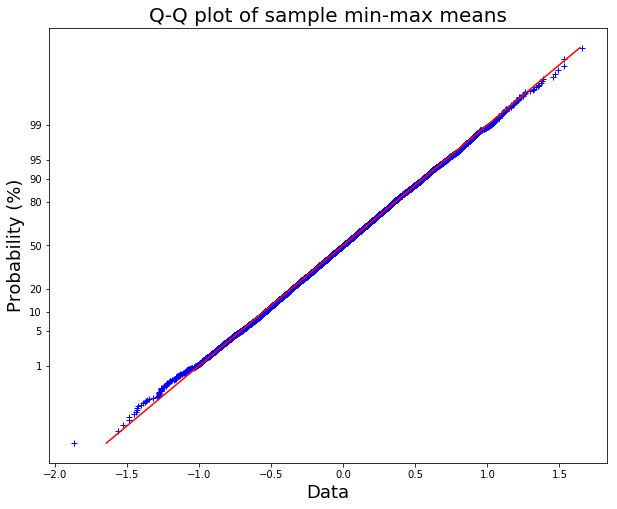

In [41]:
# Show the Q-Q plot
normplot(min_max_means, title='Q-Q plot of sample min-max means')

Once again, our distribution looks approximately normal for the min-max means. The points fall on a straight line in the Q-Q plot.

## (d)

In [42]:
# Generate 10,000 samples, each of size 256
X = np.random.normal(size=(10000, 256))

In [63]:
# For each sample size, compute the estimator values; these
# will be size (10000,) in each case.
grid = [8, 16, 32, 64, 128, 256]
mean_vars = []
median_vars = []
mmm_vars = []
for nb_samples in grid:
    means = X[:,:nb_samples].mean(axis=1)
    medians = np.median(X[:,:nb_samples], axis=1)
    min_max_means = compute_min_max_means(X[:,:nb_samples])
    mean_vars.append(means.var())
    median_vars.append(medians.var())
    mmm_vars.append(min_max_means.var())

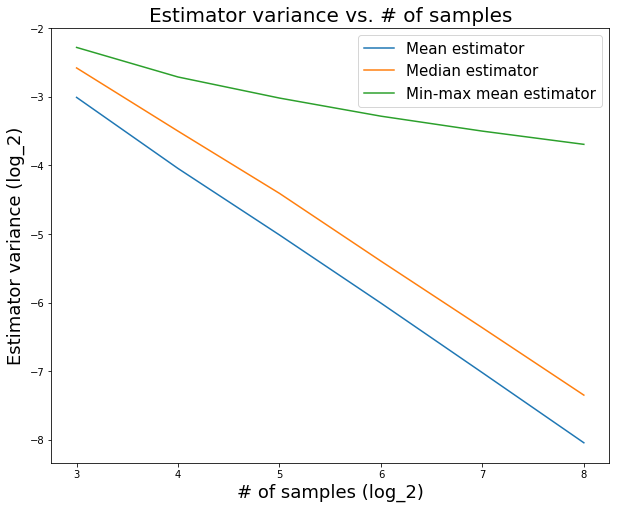

In [73]:
# Now compute the plot
plt.figure(figsize=(10, 8))
plt.plot(np.log2(grid), np.log2(mean_vars), label='Mean estimator')
plt.plot(np.log2(grid), np.log2(median_vars), label='Median estimator')
plt.plot(np.log2(grid), np.log2(mmm_vars), label='Min-max mean estimator')
plt.legend(prop={'size': 15})
plt.title('Estimator variance vs. # of samples', fontsize=20)
plt.xlabel('# of samples (log_2)', fontsize=18)
plt.ylabel('Estimator variance (log_2)', fontsize=18)
plt.show()

TODO: plot theoretical variance, answer questions

# Problem #2

## (a)

Let $A$ denote the event that we have activation in the Broca area of a human subject, and $L$ the event that the subject is using language (denote the inverse case, no language, as $NL$). We assume that the conditional distributions $P(A|L)$ and $P(A|NL)$ are both Bernoulli distributions, each parameterized by occurance probabilities $x_l$ and $x_{nl}$, respectively:

$P(A|L)\sim Bernoulli(x_l)$

$P(A|NL)\sim Bernoulli(x_{nl})$.

## (b)

## (c)

## (d)

## (e)

# Problem #3

## (a)

## (b)

## (c)

## (d)